In [1]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

shp_file_name = "NSW_LOCALITY_POLYGON_shp.shp"
zip_file_name = "nswlocalitypolygonshp.zip"
web_file_path = ("http://data.gov.au/dataset/91e70237-d9d1-4719-a82f-e71b811154c6/resource/" 
                 "bf8b5180-fcea-44bd-bd76-af14cc4b0fe0/download/nswlocalitypolygonshp.zip")

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
saved_style_state = matplotlib.rcParams.copy()

In [3]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [4]:
# Get the data loaded. This is a bit complicated because it's online as a zip file.
# If we don't have it right now, we need to get it and unzip it.
if os.path.isfile(shp_file_name):
    print "loading from file"
else:
    if os.path.isfile(zip_file_name):
        print "unzipping"
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print "loading from the internet"
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print "done"

loading from file
done


In [5]:
burbs = gp.GeoDataFrame.from_file(shp_file_name)
burbs.drop(["NSW_LOCA_1", "NSW_LOCA_3", "NSW_LOCA_4", "DT_RETIRE"], axis=1, inplace=True)
burbs

,DT_CREATE,LC_PLY_PID,LOC_PID,NSW_LOCALI,NSW_LOCA_2,NSW_LOCA_5,NSW_LOCA_6,NSW_LOCA_7,geometry
0,2015-09-03,25113,NSW1147,2015-11-10,CROYDON PARK,G,None,1,"POLYGON ((151.1170000066 -33.89151546943, 151...."
1,2015-09-03,25065,NSW2557,2015-11-10,MAYFIELD WEST,G,None,1,"POLYGON ((151.73344571654 -32.87974104891, 151..."
2,2015-09-03,25115,NSW797,2015-11-10,CAMPSIE,G,None,1,"POLYGON ((151.1072750656 -33.9017926364, 151.1..."
3,2011-11-22,16193,NSW4136,2012-02-04,WALLACETOWN,G,None,1,"POLYGON ((147.450924738497 -34.9651865379095, ..."
4,2015-09-03,24884,NSW812,2015-11-10,CANTERBURY,G,None,1,"POLYGON ((151.11758210952 -33.90297173141, 151..."
5,2015-09-03,24885,NSW1359,2015-11-10,EARLWOOD,G,None,1,"POLYGON ((151.14016397916 -33.91626727655, 151..."
6,2015-09-03,25102,NSW3578,2015-11-10,SILVERWATER,G,None,1,"POLYGON ((151.05436177755 -33.82846392023, 151..."
7,2015-09-03,24903,NSW1012,2015-11-10,CONCORD,G,None,1,"POLYGON ((151.10074278046 -33.84456767407, 151..."
8,2012-11-21,19660,NSW4098,2013-01-23,UTUNGUN,G,None,1,"POLYGON ((152.805912214383 -30.710969747357, 1..."
9,2015-09-03,24888,NSW161,2015-11-10,BALMAIN,G,None,1,"POLYGON ((151.17562156594 -33.85249200252, 151..."


DT_CREATE                                            2015-09-03
LC_PLY_PID                                                25113
LOC_PID                                                 NSW1147
NSW_LOCALI                                           2015-11-10
NSW_LOCA_2                                         CROYDON PARK
NSW_LOCA_5                                                    G
NSW_LOCA_6                                                 None
NSW_LOCA_7                                                    1
geometry      POLYGON ((151.1170000066 -33.89151546943, 151....
Name: 0, dtype: object


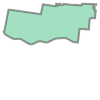

In [6]:
a = burbs.iloc[0]
print a
a.geometry

In [7]:
def add_centroid(row):
    return row.geometry.centroid

burbs["centroid"] = burbs.apply(add_centroid, axis=1)

In [8]:
right_here = shapely.geometry.point.Point(151.2299732, -33.9178754)
burbs["distance_from_UNSW"] = burbs.geometry.distance(right_here)

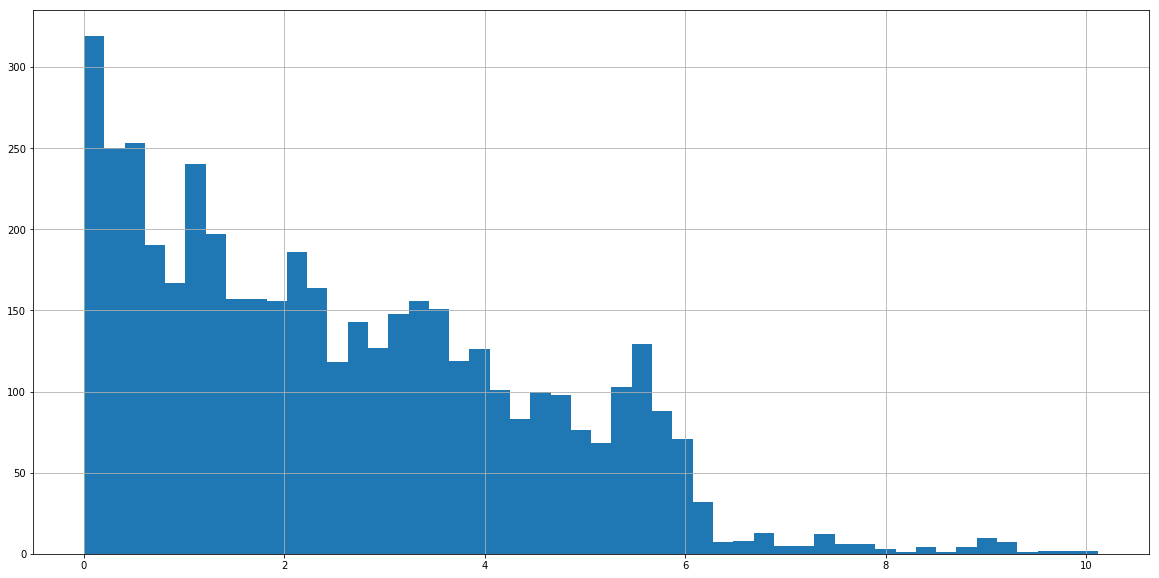

In [9]:
burbs.distance_from_UNSW.hist(bins=50);

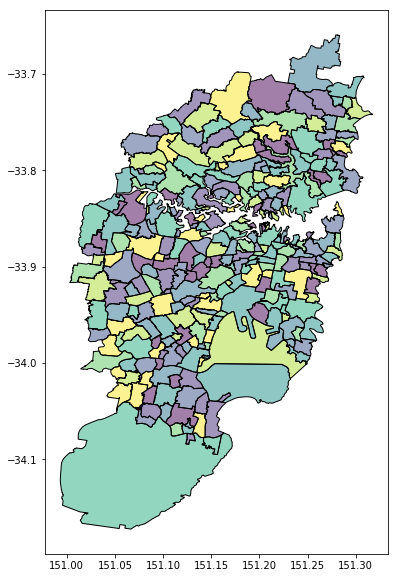

In [10]:
close_burbs = burbs[burbs.distance_from_UNSW<0.2]
close_burbs.plot();

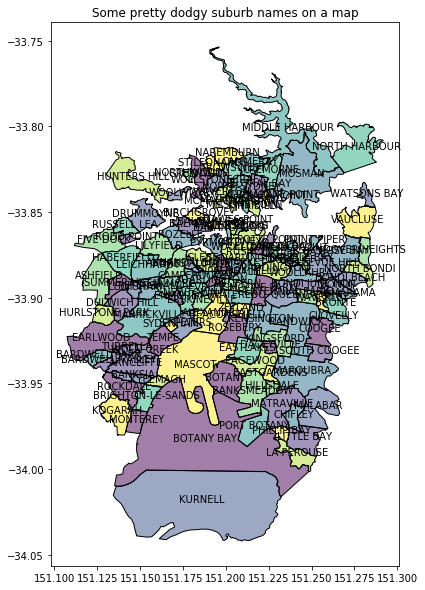

In [11]:
really_close_burbs = burbs[burbs.distance_from_UNSW<0.10]
really_close_burbs.plot()

for idx, row in really_close_burbs.iterrows():
    plt.annotate(s=row.NSW_LOCA_2, 
                 xy=tuple(row.centroid.coords)[0],
                 horizontalalignment='center')
plt.title("Some pretty dodgy suburb names on a map");

In [12]:
print right_here
in_this_burb = None
for _, row in really_close_burbs.iterrows():
    if right_here.within(row.geometry):
        in_this_burb = row
        
in_this_burb

POINT (151.2299732 -33.9178754)


DT_CREATE                                                    2012-02-16
LC_PLY_PID                                                        16612
LOC_PID                                                         NSW2123
NSW_LOCALI                                                   2012-05-04
NSW_LOCA_2                                                   KENSINGTON
NSW_LOCA_5                                                            G
NSW_LOCA_6                                                         None
NSW_LOCA_7                                                            1
geometry              POLYGON ((151.226736204561 -33.904512307867, 1...
centroid                   POINT (151.2206407346472 -33.91336830521539)
distance_from_UNSW                                                    0
Name: 1735, dtype: object